In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [2]:
# Setting the numpy random seed

np.random.seed(37)

In [3]:
df = pd.read_excel('E:/Capstone/Insurance/car insurance/Car_Insurance.xlsx')
print('Dataframe shape: ', df.shape)

Dataframe shape:  (10000, 16)


## DATA CLEANUP

In [4]:
df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,ZONE,PAST_ACCIDENTS,CLAIM_HISTORY,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,12000.0,Santro,A,0,4,No
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,16000.0,Santro,B,0,1,Yes
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,11000.0,Santro,A,0,4,No
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,11000.0,Santro,B,0,4,No
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,12000.0,Scorpio,B,1,1,Yes


In [5]:
# Checking for missing values

df.isnull().sum()

ID                      0
AGE                     0
GENDER                  0
DRIVING_EXPERIENCE      0
EDUCATION               0
INCOME                  0
CREDIT_SCORE          982
VEHICLE_OWNERSHIP       0
MARRIED                 0
CHILDREN                0
ANNUAL_MILEAGE        957
VEHICLE_TYPE            0
ZONE                    0
PAST_ACCIDENTS          0
CLAIM_HISTORY           0
OUTCOME                 0
dtype: int64

<Axes: >

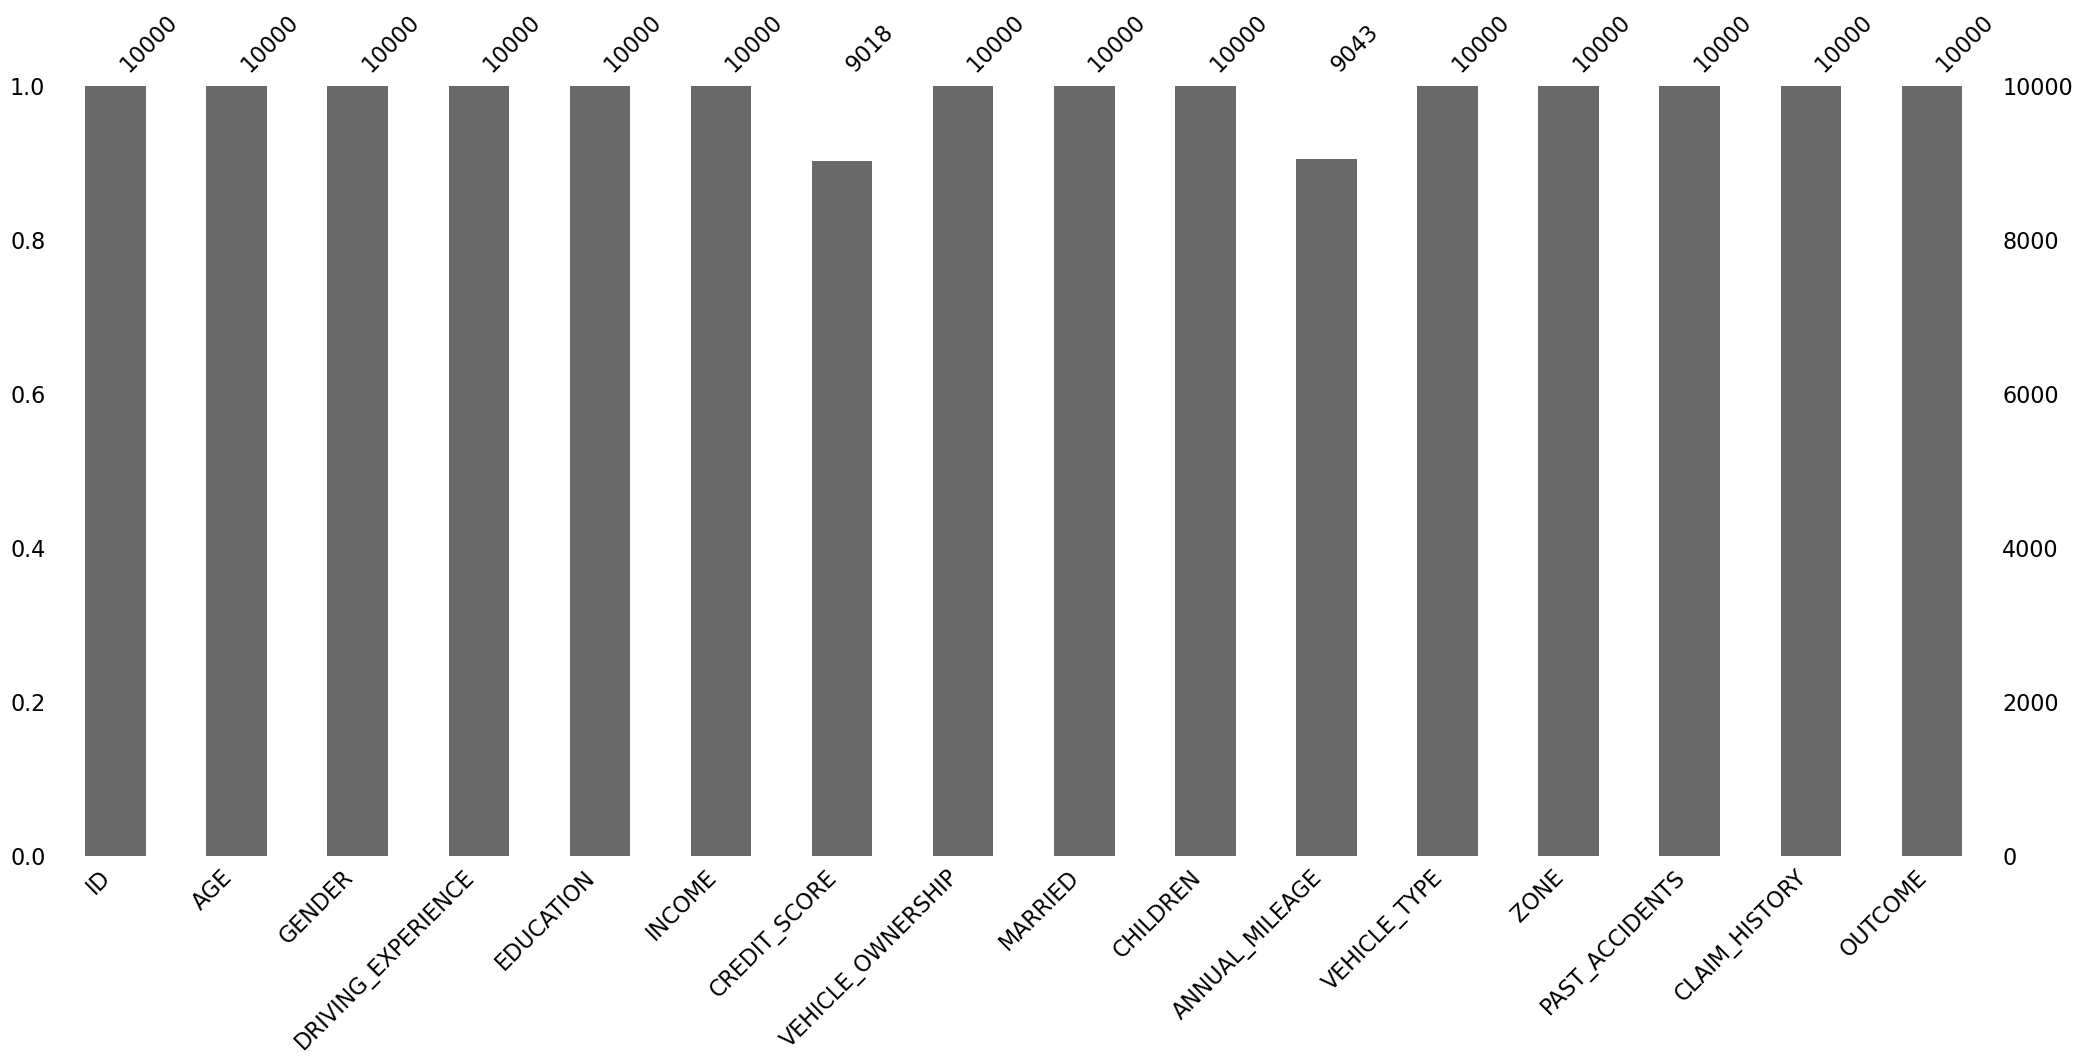

In [5]:
import pandas as pd
import missingno as msno
  

  
#Visualize the number of missing
#values as a bar chart
msno.bar(df)

In [6]:
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean(), inplace=True)

In [7]:
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean(), inplace=True)

In [9]:
# Dropping irrelevant columns
df.drop(['ID'], axis=1, inplace=True)

## VISUALIZATIONS

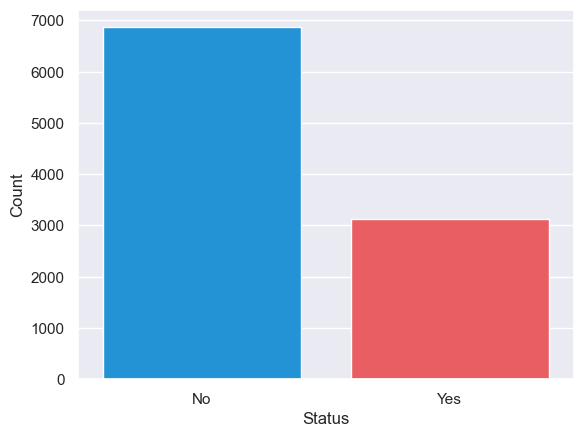

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="OUTCOME",data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Status')
plt.ylabel('Count')
plt.savefig('status_count.png')
plt.show()

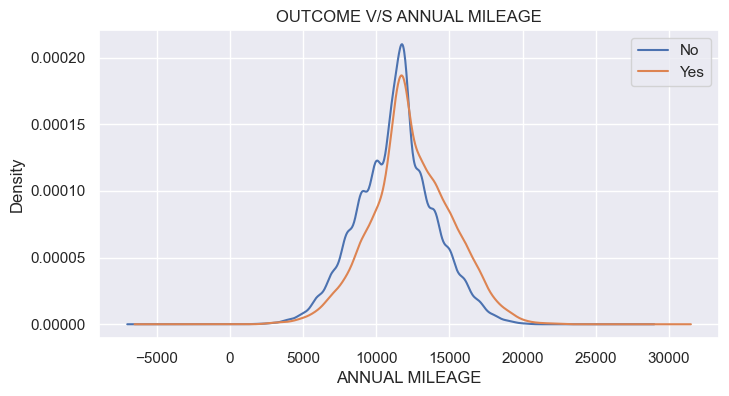

In [11]:
fig=plt.figure(figsize=(8,4))
for x in ['No','Yes']:
    df['ANNUAL_MILEAGE'][df['OUTCOME']==x].plot(kind='kde')
    
plt.title('OUTCOME V/S ANNUAL MILEAGE')
plt.legend(('No','Yes'))
plt.xlabel('ANNUAL MILEAGE')
plt.savefig('status_age_distribution.png')
plt.show()

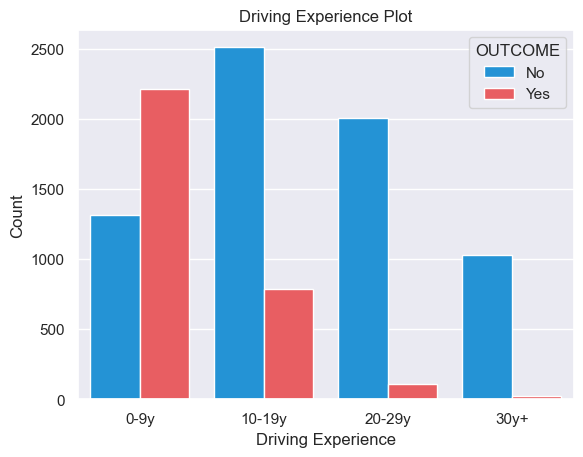

In [11]:
sns.countplot(x='DRIVING_EXPERIENCE', data=df, hue='OUTCOME', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Driving Experience Plot")
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.savefig('Driving Experience.png')
plt.show()

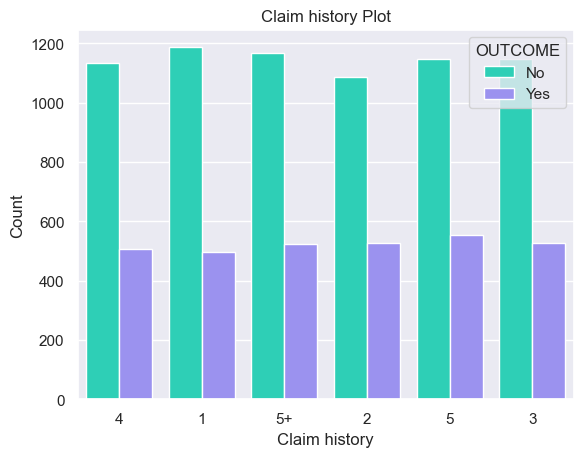

In [12]:
sns.countplot(x='CLAIM_HISTORY', data=df, hue='OUTCOME', palette=sns.xkcd_palette(["aqua", "periwinkle"]))
plt.title("Claim history Plot")
plt.xlabel('Claim history')
plt.ylabel('Count')
plt.savefig('Claim history.png')
plt.show()

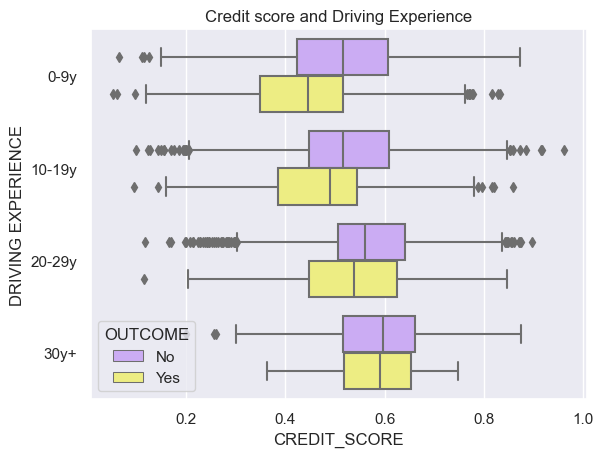

In [13]:
sns.boxplot(x='CREDIT_SCORE',data=df,hue='OUTCOME',y='DRIVING_EXPERIENCE', palette=sns.xkcd_palette(["pastel purple", "pastel yellow"]))
plt.title("Credit score and Driving Experience")
plt.xlabel('CREDIT_SCORE')
plt.ylabel('DRIVING EXPERIENCE')
plt.savefig('driving experience_credit.png')
plt.show()

In [14]:
le = LabelEncoder()
df['AGE'] = le.fit_transform(df['AGE'])
df['GENDER'] = le.fit_transform(df['GENDER'])
df['DRIVING_EXPERIENCE'] = le.fit_transform(df['DRIVING_EXPERIENCE'])
df['EDUCATION'] = le.fit_transform(df['EDUCATION'])
df['INCOME'] = le.fit_transform(df['INCOME'])
df['OUTCOME'] = le.fit_transform(df['OUTCOME'])

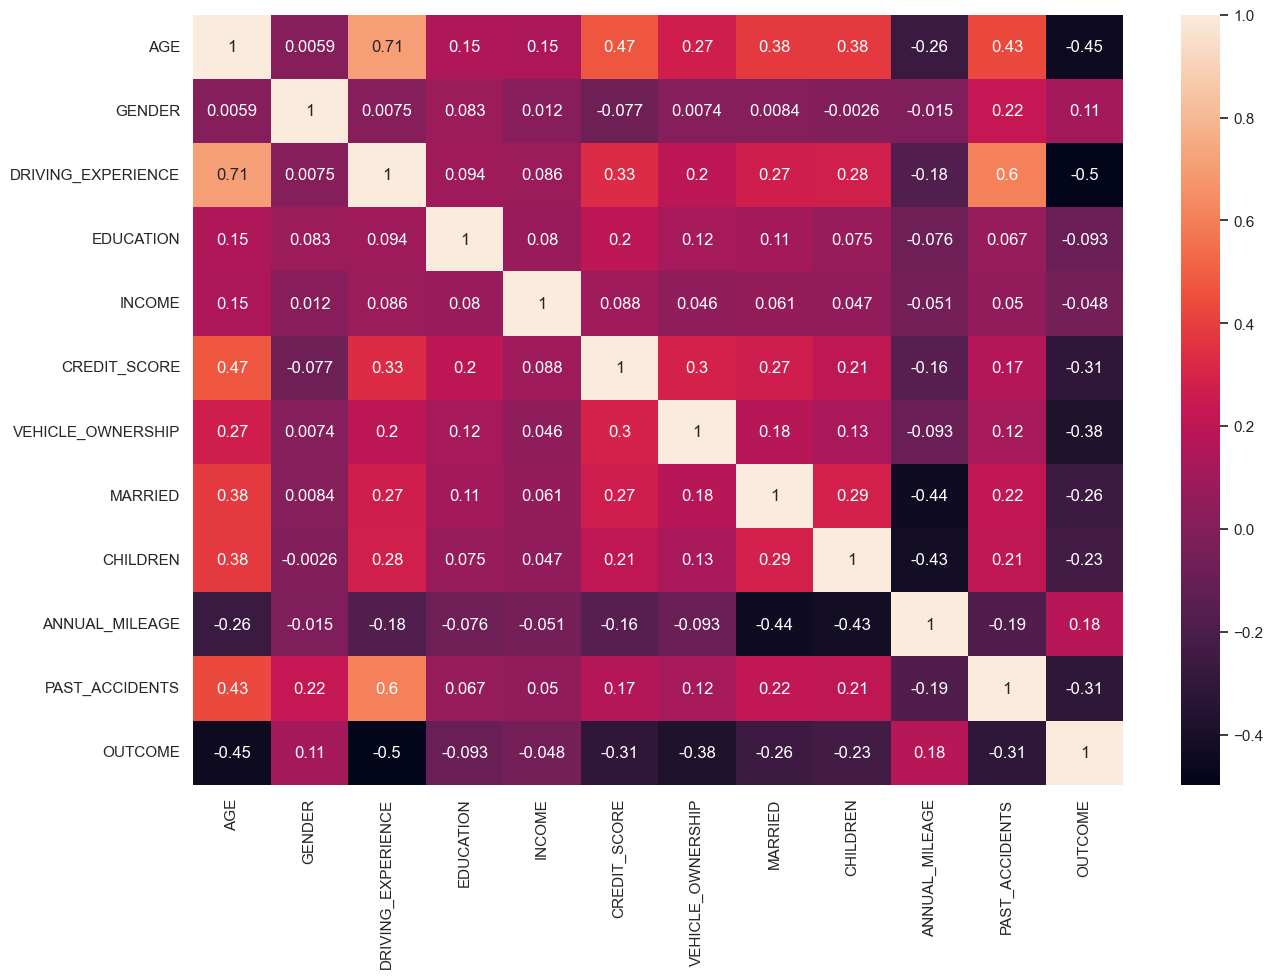

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.savefig('correlation_heatmap.png')

In [16]:
#df.drop(['ID','ZONE','CUBIC_CAPACITY','INSURER_DISCOUNT',], axis=1, inplace=True)

In [17]:
df.drop(['EDUCATION','INCOME','CREDIT_SCORE','VEHICLE_OWNERSHIP','VEHICLE_YEAR','MARRIED','CHILDREN','PAST_ACCIDENTS','Car_price','Monthly_premium'],axis=1,inplace=True)

In [18]:
df.drop(['VEHICLE_TYPE','FUEL_TYPE','CLAIM_HISTORY'],axis=1,inplace=True)

In [19]:
df.head()

,AGE,GENDER,DRIVING_EXPERIENCE,ANNUAL_MILEAGE,OUTCOME
0,3,0,0,12000.0,0
1,0,1,0,16000.0,1
2,0,0,0,11000.0,0
3,0,1,0,11000.0,0
4,1,1,1,12000.0,1


In [20]:
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']

In [21]:
clean_data = {'FUEL_TYPE': {'CNG' : 0 , 'Petrol' : 1 , 'Diesel' : 2} ,
               #'VEHICLE_TYPE': {'Scorpio': 0 , 'Santro' : 1 , 'Swift': 2},
              "AGE":{'65+': 0, '16-25': 1, '26-39' : 2, '40-64' : 3},
              "GENDER":{'male':0 ,'female':1},
              "DRIVING_EXPERIENCE":{'0-9y': 0 ,'10-19y': 1,'20-29y': 2, '30y+': 3},
              #"EDUCATION":{'high school': 0,'none': 1,'university':2},
              #"INCOME":{"upper class": 0,"poverty": 1,"working class": 2,"middle class":3},
              "CLAIM_HISTORY":{'5+':5},
              #"ZONE":{' A': 0,' B': 1},
              #"INSURER DISCOUNT":{"25%":0,"40%":1,"50%":2}
              }
df = df.copy()
df.replace(clean_data, inplace=True)
df.head()

,AGE,GENDER,DRIVING_EXPERIENCE,ANNUAL_MILEAGE,OUTCOME
0,3,0,0,12000.0,0
1,0,1,0,16000.0,1
2,0,0,0,11000.0,0
3,0,1,0,11000.0,0
4,1,1,1,12000.0,1


In [22]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [23]:
# Splitting dataset into training and testing split with 70-30% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# K-fold splits

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

### MODELLING

#### Logistic Regression

In [25]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}

# Building model
logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [26]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7883333333333333
Best Params: {'C': 0.2, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.2, solver='liblinear')


In [27]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_test)

In [28]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1806,257
Actual T,352,585


In [29]:
# Calculating metrics

logreg_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', logreg_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.797
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2063
           1       0.69      0.62      0.66       937

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.79      3000



### KNN

In [30]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance']
}

# Building model
knn = KNeighborsClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(knn, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [31]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.781142857142857
Best Params: {'n_neighbors': 19, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(n_neighbors=19)


In [32]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

knn_grid= grid.best_estimator_
y_pred = knn_grid.predict(X_test)

In [33]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1832,231
Actual T,369,568


In [34]:
# Calculating metrics

knn_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2063
           1       0.71      0.61      0.65       937

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000



### Gaussian Naive Bayes

In [35]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# No such parameters for Gaussian Naive Bayes
params = {}

# Building model
gb = GaussianNB()

# Parameter estimating using GridSearch
grid = GridSearchCV(gb, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='accuracy', verbose=1)

In [36]:
print('Best Score:', grid.best_score_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7750952380952381
Best Estimator: GaussianNB()


In [37]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

gb_grid= grid.best_estimator_
y_pred = gb_grid.predict(X_test)

In [38]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1721,342
Actual T,333,604


In [39]:
# Calculating metrics

gb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', gb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      2063
           1       0.64      0.64      0.64       937

    accuracy                           0.78      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.78      0.78      0.78      3000



### Support Vector Machines

In [40]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001,0.001, 0.01, 0.1, 1]
}

# Building model
svc = SVC(kernel='rbf', probability=True) ## 'rbf' stands for gaussian kernel

# Parameter estimating using GridSearch
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [41]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7878571428571429
Best Params: {'C': 1, 'gamma': 0.1}
Best Estimator: SVC(C=1, gamma=0.1, probability=True)


In [42]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

svm_grid= grid.best_estimator_
y_pred = svm_grid.predict(X_test)

In [43]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1812,251
Actual T,344,593


In [44]:
# Calculating metrics

svm_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', svm_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.8016666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2063
           1       0.70      0.63      0.67       937

    accuracy                           0.80      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.80      0.80      0.80      3000



### Decision Tree Classifier

In [45]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [46]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7837142857142856
Best Params: {'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}
Best Estimator: DecisionTreeClassifier(max_features=3, min_samples_leaf=10, min_samples_split=3)


In [47]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_test)

In [48]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1804,259
Actual T,381,556


In [49]:
# Calculating metrics

dtc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.7866666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2063
           1       0.68      0.59      0.63       937

    accuracy                           0.79      3000
   macro avg       0.75      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000



### Gradient Boosting Machines - XGBoost

In [50]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Building model
xgb = XGBClassifier(objective='binary:logistic')

# Parameter estimating using GridSearch
grid = GridSearchCV(xgb, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_p...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy', verbose=1)

In [51]:
print('Best Score:', grid.best_score_) 
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7867619047619048
Best Params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [52]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

xgb_grid= grid.best_estimator_
y_pred = xgb_grid.predict(X_test)

In [53]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1792,271
Actual T,347,590


In [54]:
# Calculating metrics

xgb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', xgb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.794
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      2063
           1       0.69      0.63      0.66       937

    accuracy                           0.79      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.79      0.79      0.79      3000



### Random Forest Classifier

In [55]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [False],
    'n_estimators' :[100,300],
    'criterion': ["entropy", "gini"]
}

# Building model
rfc = RandomForestClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [56]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.7848095238095238
Best Params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=10)


In [57]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

rfc_grid= grid.best_estimator_
y_pred = rfc_grid.predict(X_test)

In [58]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted A", "Predicted T"], index=["Actual A","Actual T"])

,Predicted A,Predicted T
Actual A,1795,268
Actual T,363,574


In [59]:
# Calculating metrics

rfc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', rfc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.7896666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2063
           1       0.68      0.61      0.65       937

    accuracy                           0.79      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.78      0.79      0.79      3000



In [70]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, 0.7883333333333333],
        ['K-Nearest Neighbors', knn_grid_score, 0.781142857142857],
        ['Gaussian Naïve Bayes', gb_grid_score, 0.7750952380952381],
        ['Support Vector Machines', svm_grid_score, 0.7878571428571429],
        ['Decision Tree Classifier', dtc_grid_score, 0.7837142857142856],
        ['Random Forest Tree Classifier', rfc_grid_score, 0.7867619047619048],
        ['GBM - XGBoost', xgb_grid_score,  0.7848095238095238], 
    ],
    columns= ['Model', 'Test Score', 'Train Score']
)
score_df['Test Score'] = score_df['Test Score']*100
score_df['Train Score'] = score_df['Train Score']*100

In [71]:
score_df

,Model,Test Score,Train Score
0,Logistic Regression,79.700000,78.833333
1,K-Nearest Neighbors,80.000000,78.114286
2,Gaussian Naïve Bayes,77.500000,77.509524
3,Support Vector Machines,80.166667,78.785714
4,Decision Tree Classifier,78.666667,78.371429
5,Random Forest Tree Classifier,78.966667,78.676190
6,GBM - XGBoost,79.400000,78.480952


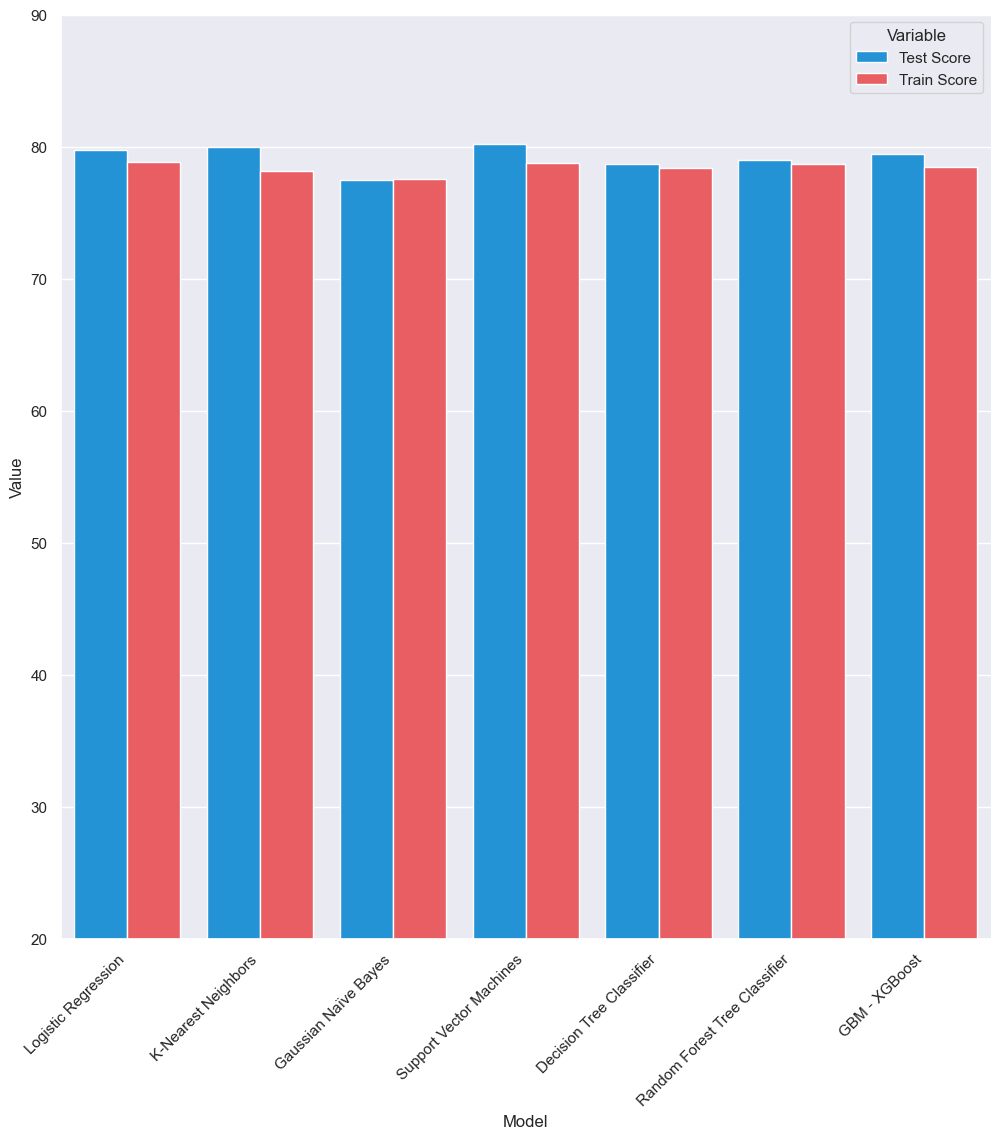

In [72]:
fig, ax1 = plt.subplots(figsize=(12,12))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1, palette=sns.xkcd_palette(["azure", "light red"]))
plt.ylim(20, 90)
plt.xticks(rotation=45, horizontalalignment="right")
plt.savefig('result.png')
sns.despine(fig)

In [63]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

In [64]:
## Prediction
y_pred=classifier.predict(X_test)

In [65]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [66]:
score

0.8

In [67]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [68]:
import numpy as np

In [78]:
classifier.predict([[4,0,1,18500]])

array([0])